## Download pre-processed images

[iafoss](https://www.kaggle.com/iafoss/hubmap-256x256)

In [2]:
trainImages := "data/image/256/train"
maskImages := "data/image/256/mask"

In [3]:
import(
    "os"
    "io/ioutil"
    "fmt"
)

In [10]:
func readImage(filename string) []byte {
    
    f, err := os.Open(filename)
    if err != nil {fmt.Print(err)}
    defer f.Close()
    
    buf, err := ioutil.ReadAll(f)
    if err != nil {fmt.Print(err)}
    
    return buf
}

In [1]:
import (
	"bytes"
	"image"
	"image/draw"
	"image/png"
	"io/ioutil"
	"os"
)

// ImageData holds infor to draw image on convas
type ImageData struct {
	Rec        image.Rectangle
	Src        image.Image
	StartPoint image.Point
}

func concatImages(imgFiles []string, padding int) ([]byte, error) {
	var data []ImageData
	var lastX int = 0

	for i := 0; i < len(imgFiles); i++ {
		f, err := os.Open(imgFiles[i])
		if err != nil {
			return nil, err
		}

		img, _, err := image.Decode(f)
		if err != nil {
			return nil, err
		}

		var imgData ImageData

		if i == 0 {
			imgData = ImageData{
				Rec:        img.Bounds(),
				Src:        img,
				StartPoint: image.Point{0, 0},
			}

			data = append(data, imgData)
			lastX = lastX + img.Bounds().Dx()
			continue
		}

		sp := image.Point{lastX + padding, 0}
		rec := image.Rectangle{sp, sp.Add(img.Bounds().Size())}

		data = append(data, ImageData{
			Rec:        rec,
			Src:        img,
			StartPoint: image.Point{padding, 0},
		})

		lastX = lastX + img.Bounds().Dx()

		f.Close()
	}

	//rectangle for the big image
	lastPoint := data[len(data)-1].Rec.Max
	r := image.Rectangle{image.Point{0, 0}, lastPoint}

	dstImage := image.NewRGBA(r)

	// start drawing
	for _, d := range data {
		draw.Draw(dstImage, d.Rec, d.Src, d.StartPoint, draw.Src)
	}

	buffer := new(bytes.Buffer)
	err := png.Encode(buffer, dstImage)
	if err != nil {
		return nil, err
	}

	return buffer.Bytes(), nil
}


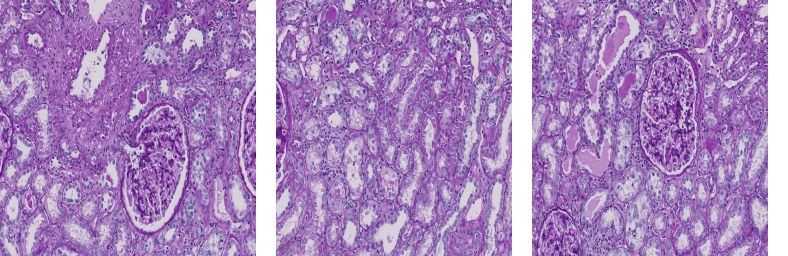

In [6]:
images := []string{
    "data/image/256/train/0486052bb_120.png",
    "data/image/256/train/0486052bb_121.png",
    "data/image/256/train/0486052bb_122.png",
}

buf, err := concatImages(images, 20)
if err != nil { fmt.Print(err)}
display.PNG(buf)